<a href="https://colab.research.google.com/github/lagom-QB/M12/blob/master/Day_04_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Attention in isolation from a large model


    In implementing Attention, more focus is placed on handling the vectors rather than the Attention model itself

    Task
        Attention Scoring
        Attention Context Vector

![alt Attention Scores](https://camo.githubusercontent.com/9b92bf3c21c653f79945000417c3a7392a679752/68747470733a2f2f6769746875622e636f6d2f6e6579636865762f686172626f75725f646c6961323032302f626c6f622f6d61737465722f64617930342f696d672f73636f72696e675f66756e6374696f6e732e706e673f7261773d31)

##Dot Attention Scores

###Attention Scoring

    Assume the input into the Scoring function is the output of the encoder or input to the decoder (decoder hidden state)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


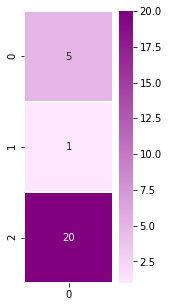

In [1]:
# ------ Import some stuff

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imagine we have this as the decoder_hidden_state

dec_hidden_state = [5,1,20] #[5,22,11]

# Visualize the decoder's hidden state
plt.figure(figsize = (2,5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)),
            annot = True,
            cmap = sns.light_palette('purple', as_cmap = True),
            linewidths = 1)

In [2]:
# Scoring attention -> dot product of both matrices / vectors

def single_dot_attention_score(dec_hidden_state,
                               enc_hidden_state):
    return np.dot(dec_hidden_state, enc_hidden_state)

enc_hidden_state = [3, 12, 44]
single_dot_attention_score(dec_hidden_state, enc_hidden_state)

907

    single_dot_annotation score is for when we have a vector. 
    What do we do if we have a matrix?

In [3]:
def dot_attention_score(dec_hidden_state, annotations):
    return np.matmul(dec_hidden_state,enc_hidden_state)

enc_hidden_state = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])
attention_weights_raw = dot_attention_score(dec_hidden_state, enc_hidden_state)
attention_weights_raw

array([927., 397., 148., 929.])

After getting our scores, we apply softmax to get the probabilistic scores

In [4]:
# --------------- Apply softmax

def softmax(x):
    x = np.array(x, dtype=np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis = 0)

attention_weights = softmax(attention_weights_raw)

attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

Multiply the weights to their vectors

In [16]:
def apply_attention_scores(attention_weights, annotations):
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, enc_hidden_state)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

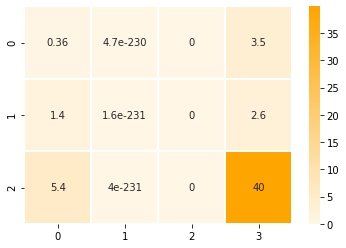

In [15]:
# Look at it
ax = sns.heatmap(applied_attention, 
                 annot=True, 
                 cmap=sns.light_palette("orange", 
                                        as_cmap=True), 
                 linewidths=1)

###Attention context Vector

    Attention context vector is the sum of the columns to produce a single vector

In [18]:
def calculate_attention_context_vector(applied_attention):
    return np.sum(applied_attention, 
                  axis = 1)
    
attention_context_vector = calculate_attention_context_vector(applied_attention)

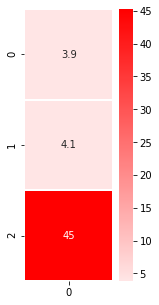

In [20]:
# Look at the attention context vector
plt.figure(figsize=(2, 5))
sns.heatmap(np.transpose(np.matrix(attention_context_vector)), 
            annot=True, 
            cmap=sns.light_palette("Red", 
                                   as_cmap=True), 
            linewidths=1)

    We can concatenate the attention_context_vector with a hidden state (in this class we didn't have one) and pass through a hidden layer to produce the result of this decoding.

##General Attention Score

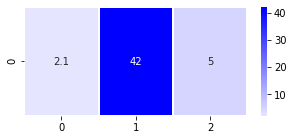

In [23]:
dec_hidden_state = [5,1,2,4,16]
Wa = np.random.randn(5, 3)/100. 

def general_attention_score(dec_hidden_state, Wa, enc_hidden_state):
    return np.dot(np.transpose(dec_hidden_state),
                  np.dot(Wa, 
                         enc_hidden_state))
    
attention_weights_raw = general_attention_score(dec_hidden_state, Wa, enc_hidden_state)
# Do softmax
attention_weights = softmax(attention_weights_raw)
# Multiply weights by its vector
applied_attention = apply_attention_scores(attention_weights, enc_hidden_state)
# Get attention context vector
attention_context_vector = calculate_attention_context_vector(applied_attention)
# Look at the attention_context_vector
plt.figure(figsize=(5, 2))
sns.heatmap(np.matrix(attention_context_vector), 
            annot=True, 
            cmap=sns.light_palette("Blue", as_cmap=True), 
            linewidths=1)

##Concat Attention Score

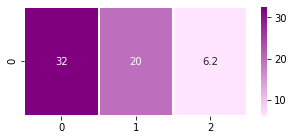

In [30]:
Wd = np.random.randn(5, 6) 
We = np.random.randn(3, 6)

Vec_a = np.random.randn(6)

def concat_attention_score(dec_hidden_state, enc_hidden_state, Wd, We, Vec_a):
    return np.tanh(np.array(dec_hidden_state).dot(Wd) + 
                   np.array(enc_hidden_state).T.dot(We)).dot(Vec_a)

attention_weights_raw = concat_attention_score(dec_hidden_state, enc_hidden_state, Wd, We, Vec_a)
# Do softmax
attention_weights = softmax(attention_weights_raw)
# Multiply weights by its vector
applied_attention = apply_attention_scores(attention_weights, enc_hidden_state)
# Get attention context vector
attention_context_vector = calculate_attention_context_vector(applied_attention)
# Look at the attention_context_vector
plt.figure(figsize=(5, 2))
sns.heatmap(np.matrix(attention_context_vector), 
            annot=True, 
            cmap=sns.light_palette("purple", as_cmap=True), 
            linewidths=1)